# **Esame del 25 gennaio 2024**

- Non si possono consultare libri, note, ed ogni altro materiale o persone durante
l’esame ad eccezione delle funzioni Python fornite.

- Risolvere i seguenti esercizi con l’ausilio di Python.

- La durata del compito è di 90 minuti.

- Questo esame ha 3 domande, per un totale di 30/30 punti.

- Svolgere gli esercizi marcati con [T] su fogli protocollo, indicando: nome, cognome, codice persona
e data

#Esercizio 1 (10 punti)

Consideriamo la seguente funzione definita sull'intervallo $(-1,1)$.

$$
f(x) = \dfrac{1}{1+25x^2}
$$

a) (3 punti) [P] Approssimare $f$ mediante interpolazione polinomiale Lagrangiana su nodi equispaziati di grado $n = [5,10,15]$. Riportare graficamente i polinomi interpolanti ottenuti sovrapposti alla funzione $f$ e l'errore in spazio; stampare a schermo il massimo dell'errore nei tre casi,

$$
\text{err}_n = \max_{x\in(-1,1)} |f(x)-\Pi_n f(x)|
$$

Cosa osserviamo?

*Soluzione.* Possiamo costruire l'inerpolazione polinomiale Lagrangiana su nodi equispaziati come segue:

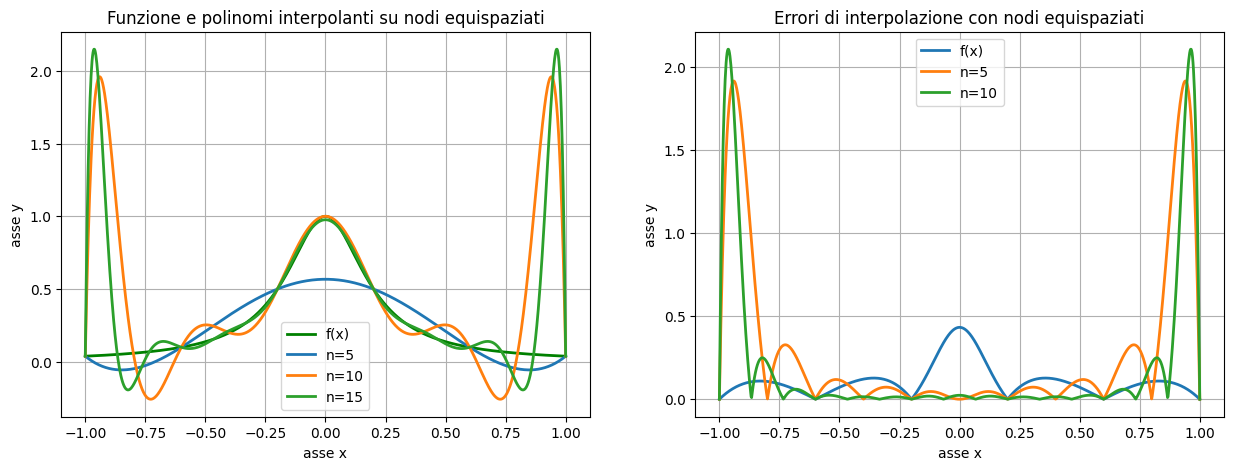

n 		 err 
---------------
5 	 0.432669
10 	 1.915633
15 	 2.106860


In [ ]:
# Punto (a)
import numpy as np
import matplotlib.pyplot as plt

# Dati del problema
a,b = -1,1
fun = lambda x : 1/(1 + 25 * x**2)

grado = [5,10,15]
err_max = []

# Coordinate per plottare la funzione
x_dis = np.linspace(a,b,1000)
f_dis = fun(x_dis)

# Plot funzione
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(x_dis,f_dis,'g',linewidth = 2)
plt.title('Funzione e polinomi interpolanti su nodi equispaziati')
plt.xlabel('asse x')
plt.ylabel('asse y')
plt.grid()

plt.subplot(1,2,2)
plt.title('Errori di interpolazione con nodi equispaziati')
plt.xlabel('asse x')
plt.ylabel('asse y')
plt.grid()

for n in grado:
  # Nodi di interpolazione
  x_nod = np.linspace(a, b, n+1)
  f_nod  = fun(x_nod)
  # Polinomio interpolante
  P = np.polyfit(x_nod, f_nod, n)
  # Coordinate per plottare l'interpolante
  poly_dis = np.polyval(P, x_dis)

  plt.subplot(1,2,1)
  plt.plot(x_dis, poly_dis, linewidth = 2)

  # Calcolo dell'errore
  err_dis = np.abs(poly_dis - f_dis)
  err_max.append(np.max(err_dis))

  # Plot errore
  plt.subplot(1,2,2)
  plt.plot(x_dis, err_dis, linewidth = 2)

plt.subplot(1,2,1)
plt.legend(['f(x)', 'n=5', 'n=10', 'n=15'])
plt.subplot(1,2,2)
plt.legend(['f(x)', 'n=5', 'n=10', 'n=15'])

plt.savefig('ese1_sol_a.png')
plt.show()

print('n \t\t err \n' + '-'*15)
for n in range(len(grado)):
  print('%d \t %f' %(grado[n], err_max[n]))


Notiamo che aumentando il grado di approssimazione lìinterpolante risulta meno accurato agli estremi dell'intervallo $(-1,1)$, tipico fenomeno Runge associato all'interpolazione polinomiale Lagrangiana su nodi equispaziati. Infine il massimo errore è il seguente:

0.432669

1.915633

2.106860

b) (4 punti) [T] Si discuta la stabilità e la convergenza dell'interpolazione polinomiale Lagrangiana du nodi equispaziati e su nodi di Chebychev-Gauss-Lobatto.

*Soluzione.* Data una funzione $f$ definita du $I$ e dati $n+1$ nodi $x_i$, considero la sua interpolazione Lagrangiana data da

$$
\Pi_n f(x) = \sum_{i=0}^n f(x_i)\mathcal{L}_i(x
 = \sum_{i=0}^n y_i \mathcal{L}_i(x),
 $$

 dove $\Pi_n$ è l'operatore di interpolazione che data una funzione $f$ restituisce il polinomio interpolatore $\pi_n$ negli $n+1$ punti $x_i$. Considero ora una funzione $\tilde{f}$ ottenuta perturbando $f$: il suo interpolato è dato dalla seguente espressione

 $$
 \Pi_n \tilde{f}(x) = \sum_{i=0}^n \tilde{f}(x_i)\mathcal{L}_i(x).
 $$

 Possiamo calcolare la differenza tra l'interpolata di $f$ e la sua perturbata per capire come si propagano le perturbazioni

 $$
 \| \Pi_n f - \Pi_n \tilde{f} \|_{\infty} \leq \max_{i=0,\dots,n} |f(x_i) - \tilde{f}(x_i)| \max_{x\in I} \left|\sum_{i=0}^n \mathcal{L}_i(x)\right|
 $$

L'ultimo termine, che non dipende da $f$ ma solo dai valori dei $\mathcal{L}_i$ nei nodi $x_i$, è detto costante di Lebesgue e, per nodi equispaziati, è data da

$$
\Lambda_n = \max_{x\in I} \left|\sum_{i=0}^n \mathcal{L}_i(x)\right| ≈ \dfrac{2^{n+1}}{en\log(n+\gamma)}
$$

tale valore cresce molto all'aumentare di $n$ rendendo quindi non stabile l'interpolazione polinomiale Lagrangiana su nodi equispaziati. Nel caso in cui considerassimo i nodi Chebyschev-Gauss-Lobatto tale costante risulterebbe

$$
\Lambda_n < \dfrac{2}{\pi} \log n
$$

ha una crescita di tipo logaritmico in $n$.

Per quanto rigruarda la convergenza, non è garantita nel caso di nodi uniformi, ovvero in generale

$$
\lim_{n\to∞}\max_{x\in I} \left|E_n f(x)\right| \neq 0.
$$

Mentre per nodi di Chebychev-Gauss-Lobatto il polinomio intepolatore $\Pi_n f$ è tale che $\Pi_nf → f$ per $n → ∞$, ovvero abbiamo convergenza all'aumentare del grado polinomiale.

c) (3 punti) [P] Ripetere quanto fatto al punto (a) per nodi di Chebyschev-Gauss-Lobatto.

*Soluzione.* Possiamo costruire l'interpolazione polinomiale Lagrangiana su nodi di Chebyschev-Gauss-Lobatto come segue:

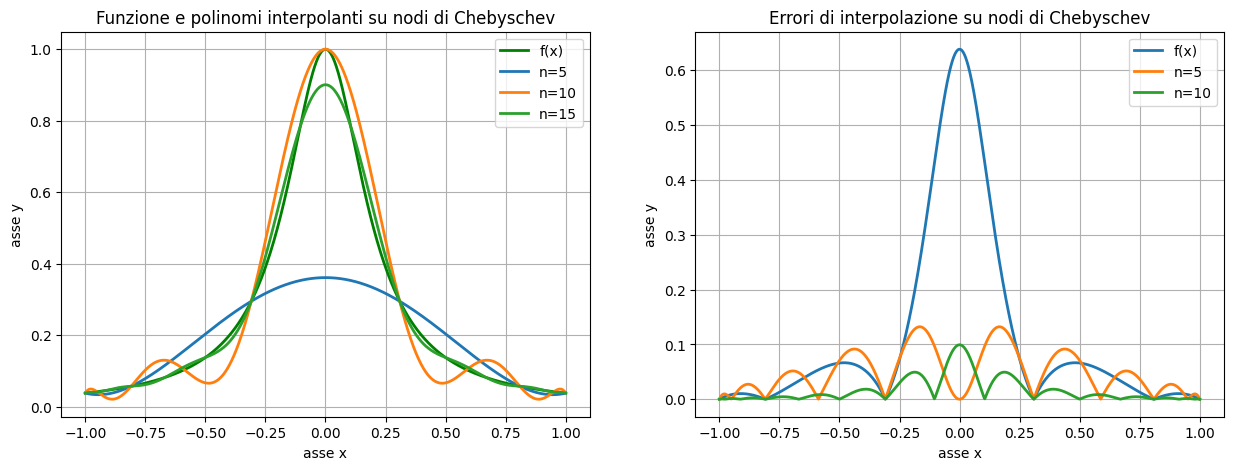

n 		 err 
---------------
5 	 0.638617
10 	 0.132195
15 	 0.099308


In [ ]:
#Punto (c)
import numpy as np
import matplotlib.pyplot as plt

# Dati del problema
a,b = -1,1
fun = lambda x : 1/(1 + 25 * x**2)

grado = [5,10,15]
err_max = []

# Plot funzione
x_dis = np.linspace(a,b,1000)
f_dis = fun(x_dis)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(x_dis,f_dis,'g',linewidth = 2)
plt.title('Funzione e polinomi interpolanti su nodi di Chebyschev')
plt.xlabel('asse x')
plt.ylabel('asse y')
plt.grid()

plt.subplot(1,2,2)
plt.title('Errori di interpolazione su nodi di Chebyschev')
plt.xlabel('asse x')
plt.ylabel('asse y')
plt.grid()

for n in grado:
  # Nodi di interpolazione
  k = np.arange(n+1)
  t = -np.cos(np.pi*k/n)
  x_nod = (a+b)/2 + ((b-a)/2)*t
  f_nod  = fun(x_nod)
  # Polinomio interpolante
  P = np.polyfit(x_nod, f_nod, n)
  # Coordinate per plot intepolante
  poly_dis = np.polyval(P, x_dis)

  plt.subplot(1,2,1)
  plt.plot(x_dis, poly_dis, linewidth = 2)

  # Calcolo dell'errore
  err_dis = np.abs(poly_dis - f_dis)
  err_max.append(np.max(err_dis))

  plt.subplot(1,2,2)
  plt.plot(x_dis, err_dis, linewidth = 2)

plt.subplot(1,2,1)
plt.legend(['f(x)', 'n=5', 'n=10', 'n=15'])
plt.subplot(1,2,2)
plt.legend(['f(x)', 'n=5', 'n=10', 'n=15'])

plt.savefig('ese1_sol_c.png')
plt.show()

print('n \t\t err \n' + '-'*15)
for n in range(len(grado)):
  print('%d \t %f' %(grado[n], err_max[n]))


Notiamo che aumentando il grado di approssimazione l'interpolante risulta più accurata su tutto l'intervallo $(-1,1)$, non abbiamo più fenomeno di Runge associato all'interpolazione polinomiale Lagrangiana su nodi equispaziati.

Il massimo dell'errore che otteniamo è il seguente:

0.638617

0.132195

0.099308

# Esercizio 2 (10 punti)

Si consideri la seguente funzione

$$
f(x) = x^3 \sin(x-1) \quad \text{per}\ x\in(-1,1)
$$

a) (1 punto) [P] Si rappresenti $f$ in Python e si identifichi il valore $\alpha$ tale per cui $f(\alpha) = 0$.

*Soluzione.* Ecco un possibile script per rappresentare $f$

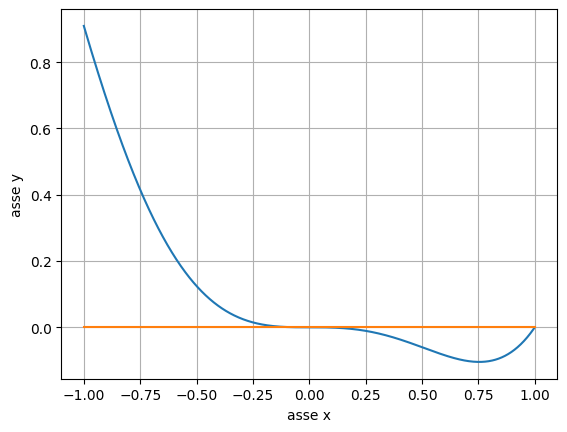

In [ ]:
#Punto (a)
import matplotlib.pyplot as plt
import numpy as np

f = lambda x : x**3 * np.sin(x-1)

a,b = -1,1

x_val = np.linspace(a, b, 1000)

plt.figure()
plt.plot(x_val,f(x_val))
plt.plot(x_val, 0*x_val)    # Plot asse y = 0
plt.grid()
plt.xlabel('asse x')
plt.ylabel('asse y')
plt.show()

Dal grafico possiamo notare che lo zero $\alpha$ della funzione $f$ è situato in 0.

b) (3 punti) [T] Derivare il metodo di Newton per la ricerca degli zeri di una funzione, riportando anche le sue proprietà di convergenza.

*Soluzione.* Dato, all'iterazione $k$, un valre di tentativo per lo zero esatto $x^k$, la retta tangente a $f$ in x^k$ è data da

$$
\dfrac{f(x)-f(x^k)}{x-x^k} = f'(x^k) \quad \Rightarrow \quad f(x) = f(x^k) +f'(x^k)(x-x^k).
$$

Quindi dato $x^k$, il punto $x^{k+1}$ è trovato come punto di intersezione della retta tangente l'asse $x$ ovvero lo zero della retta tangente approssimante $f$. Abbiamo che

$$
f(x^{k+1}) = f(x^k) + f'(x^k)(x^{k+1}-x^k) = 0 \quad \Rightarrow \quad x^{k+1} = x^{k} - \dfrac{f(x^k)}{fì(x^k)}.
$$

Per la convergenza ci basiamo sul seguente risultato:

**Teorema 1.** *Sia $f:[a,b]\rightarrow \mathbb{R}$ una funzione di classe $\mathcal{C}^2$ in $[a,b]$. Sia $\alpha$ tale che $f(\alpha) = 0$ e $f'(\alpha) \neq 0$, ovvero di molteplicità algebrica pari a 1. Allora esiste $\eta > 0$ tale che scelgo $x^0$ in modo che $|x^0-\alpha|<\eta$ allora si ha
$$
\forall k \in \mathbb{N} \quad |x^k-\alpha|<\eta,
$$
inoltre il metodo risulta convergente, ovvero
$$
\lim_{k\to\infty} x^k = \alpha,
$$
infine il meotodo di Newton ha una convergenza quadratica, abbiamo*
$$
\lim_{k\to\infty} \dfrac{x^{k+1}-\alpha}{(x^k-\alpha)^2} = C = \dfrac{f''(\alpha)}{2f'(\alpha)}
$$

c) (2 punti) [P] Applicare il metodo di Newton per il calcolo di $\alpha$, partire da un valore iniziale pari a $x_0 = 0.5$ e impostare una tolleranza pari a $10^{-8}$. Rappresentare in sacala semilogy l'errore ottenuto e commentare alla luce della teoria.

Per il metodo di Newton si utilizzi la function $\texttt{newton}$ presente nello script $\texttt{functions2023.py}$

In [ ]:
#Punto (c)
from functions import newton

x0 = 0.5
tol = 1e-8
nmax = 1000

x_ex = 0     # Prendiamo x = 0 come zero esatto

df = lambda x : 3*x**2 * np.sin(x-1) + x**3 * np.cos(x-1)

xvect,it = newton(x0,nmax,tol,f,df)


 Numero di iterazioni: 42 

 Zero calcolato: 1.391349e-08



Il metodo si arresta dopo 42 iterazioni e il valore finale calcolato è $1.391349\cdot 10^{-8}$. Assumento $\alpha=0$ la soluzione esatta, allora l'errore calcolato è rappresentato dal seguente grafico, in cui possiamo notare l'andamento lineare

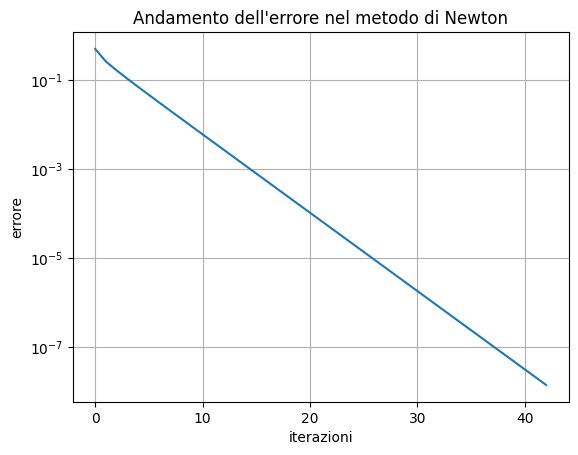

In [ ]:
plt.figure()
plt.semilogy(np.abs(xvect - x_ex))
plt.title("Andamento dell'errore nel metodo di Newton")
plt.xlabel('iterazioni')
plt.ylabel('errore')
plt.grid()
plt.show()

d) (2 punti) [T] Si proponga una modifica al metodo di Newton per il calcolo degli zeri di molteplicità algebrica maggiore di 1.

*Soluzione.* Introducendo $m$ come molteplicità algebrica dello zero $\alpha$, possiamo quindi presentare il metodo di Newton modificato come

$$
x^{k+1} = x^k - m \dfrac{f(x^k)}{f'(x^k)}.
$$

Se tale metodo converge, allora converge quadraticamente, come nel caso di Newton la convergenza è solo locale, cioè per un $x^0$ sufficientemente vicino al valore di $\alpha$.

e) (2 punti) [P] Si estenda opportunamente la function $\texttt{newton}$ in modo da implementare quanto proposto al punto precedente. Utilizzando questa nuova funzione ripetere quanto fatto al punto c, sovrapponendo gli errori sullo stesso grafico. Commentare i risultati ottenuti.

*Soluzione.* La function $\texttt{newtmod}$ che implementa il metodo di Newton modificato è la seguente

In [ ]:
def newtmod(x0,nmax,toll,fun,dfun,mol):
  """
  Metodo di Newton modificato per la ricerca degli zeri della funzione fun.
  Test d'arresto basato sul controllo della differenza tra due iterate successive.

  input:
          x0: punto di partenza
          nmax: numero massimo di iterazioni
          toll: tolleranza sul test d'arresto
          fun, dfun: lambda function contenenti la funzione e la sua derivata
          mol: molteplicità dello zero cercato

   output:
          xvect: vettore contenente tutte le iterate calcolate
                   (l'ultima componente è la soluzione)
          it: iterazioni effettuate
  """

  err = toll+1
  it = 0
  xvect = [x0]

  while it < nmax and err >= toll:
    xv = xvect[-1]
    if np.abs(dfun(xv)) < np.finfo(float).eps:
      print('Arresto per azzeramento di dfun')
      it = it+1
      break
    else:
      xn = xv - mol * fun(xv) / dfun(xv)
      err = np.abs(xn-xv)
      xvect.append(xn)
      it = it+1

  print('\n Numero di iterazioni: %d\n' %it)
  print(' Zero calcolato: %e' %xvect[-1])

  xvect = np.array(xvect)

  return xvect,it

Possiamo quindi calcolare lo zero della funzione nel modo seguente

In [ ]:
# Punto (c)

mol = 3
xvect_mod,it_mod = newtmod(x0,nmax,tol,f,df,mol)

Arresto per azzeramento di dfun

 Numero di iterazioni: 5

 Zero calcolato: -1.029883e-11


Il metodo si arresta dopo 5 iterazioni e il valore finale calcolato è $-1.029883\cdot 10^{-11}$.

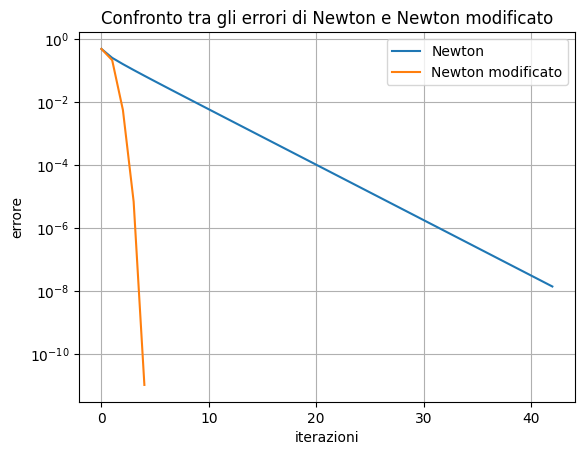

In [ ]:
plt.figure()
plt.semilogy(np.abs(xvect - x_ex))
plt.semilogy(np.abs(xvect_mod - x_ex))
plt.title("Confronto tra gli errori di Newton e Newton modificato")
plt.xlabel('iterazioni')
plt.ylabel('errore')
plt.legend(['Newton','Newton modificato'])
plt.grid()
plt.savefig('ese2_sol_c.png')
plt.show()

Dal grafico sull'andamento dell'errore notiamo che la nuova versione converge molto più rapidamente.

#*Esercizio 3* (10 punti)

Assumendo $c>0$, si consideri la seguente equazione di conservazione

$$
\begin{cases}
  \partial_t c +\partial_x (0.5c^2) = 0, & x\in (0,5),\ t\in(0,T], \\
  c(0,x) =
    \begin{cases}
      3, & x\leq 2.5, \\
      5.5 - x, & x>3.5,
    \end{cases}
    & x\in (0,5), \\
  c(t,0) = 0, & t\in (0,T]
\end{cases}
$$

dove il tempo finale è pari a $T=1$.

a) (3 punti) [T] Verificare se il flusso numerico Upwind è applicabile per la discretizzazione proposta con il metodo dei volumi finiti. Scegliere il valore $h = 0.125$ costante per l'ampiezza delle celle. Calcolare quindi il massimo $\Delta t$ ammeso e chiamare $\Delta t_{max}$ tale valore.

*Soluzione.* Nel caso in esame abbiamo $f(c) = \dfrac{1}{2}c^2$ e $f'(c) = c$. In base ai dati iniziali forniti il valore minimo e massimo di $c$ sono rispettivamente $c_m = c(5) = 0.5$ e $c_M = 3$, e per tali valori la derivata prima della funzione flusso è sempre non negativa quindi il flusso Upwind è apllicabile. Il massimo della derivata $f'(c)$ si ottiene in corrispondenza di $c=3$ e vale $\max_{c\in(c_m,c_M)} |f'(c)| = 3$. Per soddisfare la condizione CFL dobbiamo quindi garantire che $\Delta t \max_{c\in (c_m,c_M)} |f'(c)| < h$. Con i valori scelti si ottiene $\Delta t_{max} = 0.125/3 = 0.041\bar{6}$.

b) (3 punti) [P] Sia $N = \dfrac{T}{\Delta t_{max}}$, risolvere il problema utilizzando la function $\texttt{fvsolve}$ contenuta nel file $\texttt{funzioni.py}$, utilizzando il metodo Upwind per $N,\ N-2$ e $2N$ passi temporali (attenzione: calcolare i $\Delta t$ corrispondenti!) e rappresentare le soluzioni ottenute usando la function $\texttt{xtplot}$ contenuta nel file $\texttt{utilis}\_\texttt{plot}\_\texttt{cl.py}$.

Commentare cosa si osserva.

*Soluzione.* Il numero di intervalli $N$ si ottiene come $N = 1/0.125 = 8$. Definiamo i dati necessari per la soluzione numerica e impostiamo il ciclo per calcolare la soluzione con il numero di intervalli richiesto:

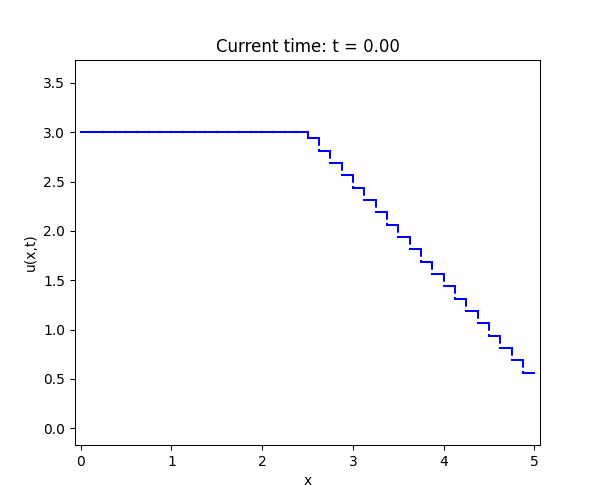

<Figure size 640x480 with 0 Axes>

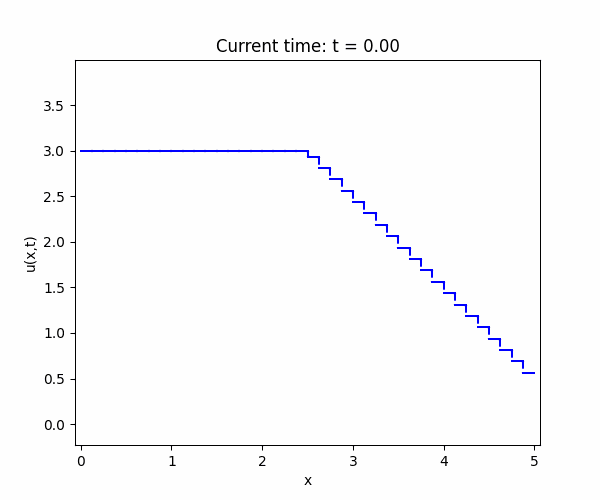

<Figure size 640x480 with 0 Axes>

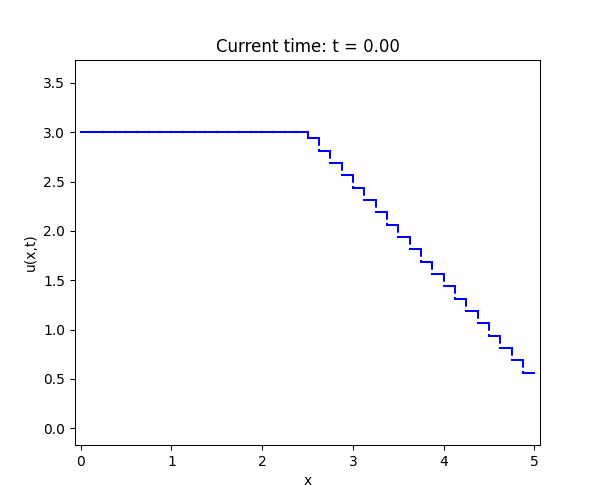

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import functions
from utilis_plot_cl import xtplot

# Dati del problema
u0 = lambda x : 3*(x <= 2.5) + (5.5 - x)*(x > 2.5)
f  = lambda c : 0.5*c**2
df = lambda c : c

h = 0.125
dtlim = h/df(3)
L = 5
T =1
N = T/dtlim

# Soluzione per vari valori di N
for n in [N, N-2, N*2]:
  xc, t, u = functions.fvsolve(u0, f, df, L, T, h, T/n, 'UPWIND')
  plt.figure()
  xtplot(xc,t,u)
  plt.show()

Osserviamo nei tre grafici che per il passo temporale "limite" la soluzione è corretta e si osserva la formazione di uno shock; per un passo temporale leggermente superiore al massimo consentito dalla CFL si ha un andamento non fisico; per passi temporali minori si ha una soluzione corretta, con una maggiore diffusione numerica.

c) (2 punti) [T] Si descriva il flusso numerico di Godunov e se ne discutano le proprità.

*Soluzione.* L'idea per introdurre il flusso di Godunov è quella di partire da una soluzione costante a tratti a tempo $t_n$ e di risolvere problemi di Riemann ad ogni interfaccia fra due celle vicine. Per calolare il flusso di Godunov fra le celle $i$ e $i+1$ consideriamo che, a seconda dei valori $c_n^i$ e $c^n_{i+1}$ e della "forma" del flusso, possiamo avere uno shock, una rarefazione o una combinazione dei due; questo determina il valore della soluzione $c^*$ nel nodo $i+\dfrac{1}{2}$ nell'intervallo di tempo $[t_n,t_{n+1}]$. Utilizzando $c^*$ possiamo valutare il flusso numerico all'interfaccia.

Il flusso di Godunov risultante si può esprimere in modo sintetico con la seguente definizione:

$$
F^G_{i+\frac{1}{2}}(c_i,c_{i+1}) =
\begin{cases}
  \min f(\xi), \ \xi\in[c_i,c_{i+1}] &\text{se}\ c_i\leq c_{i+1}, \\
  \max f(\xi), \ \xi\in[c_{i+1},c_i] &\text{se}\ c_i\geq c_{i+1}.
\end{cases}
$$

Osserviamo che se $f$ è monotona questa definizione coincide con il flusso upwind.

d) (2 punti) [P] Si calcoli la soluzione del problema proposto utlizzando ora il flusso numerico di Godunov e un opportuno passo temporale.

*Soluzione.* Scegliamo ad esempio un passo $\Delta t = 0.9 \Delta t_{\max}$:

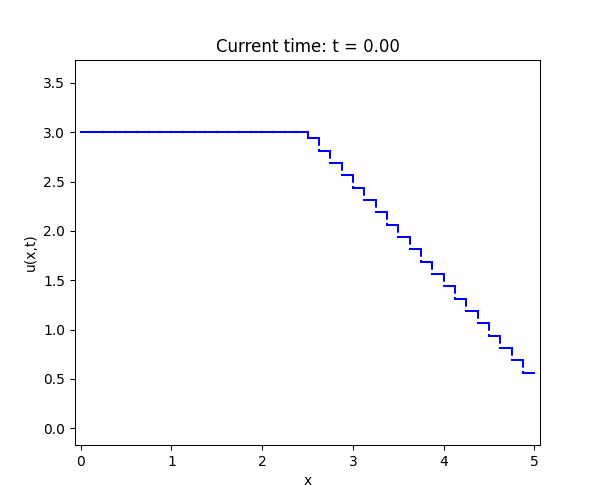

<Figure size 640x480 with 0 Axes>

In [ ]:
xc, t, u = functions.fvsolve(u0, f, df, L, T, h, T/N, 'GODUNOV')
plt.figure()
xtplot(xc,t,u)
plt.show()

La soluzione ottenuta è simile a quella ottenuta con il flusso upwind.